## [Lambda](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Lambda) Layer walkthrough 

<table class="colab-notebook-buttons" align="center" width="50%";>
  <td><center>
    <a target="_blank" href="https://colab.research.google.com/github/Atharva-Gundawar/Huber_and_friends/blob/main/Huber_and_friends.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    </br>Run in Google Colab</a>
  </center></td>
  <td><center>
    <a target="_blank" href="https://github.com/Atharva-Gundawar/Huber_and_friends/blob/main/Huber_and_friends.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    </br>View source on GitHub</a>
  </center></td>
</table>

## Preparing the colab 

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np


In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [4]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
)

Epoch 1/10
469/469 [==============================] - 9s 6ms/step - loss: 0.3667 - sparse_categorical_accuracy: 0.8997 - val_loss: 0.1964 - val_sparse_categorical_accuracy: 0.9438
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1722 - sparse_categorical_accuracy: 0.9518 - val_loss: 0.1378 - val_sparse_categorical_accuracy: 0.9614
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1224 - sparse_categorical_accuracy: 0.9646 - val_loss: 0.1111 - val_sparse_categorical_accuracy: 0.9670
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0943 - sparse_categorical_accuracy: 0.9726 - val_loss: 0.0937 - val_sparse_categorical_accuracy: 0.9713
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0754 - sparse_categorical_accuracy: 0.9783 - val_loss: 0.0865 - val_sparse_categorical_accuracy: 0.9733
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0624 - sparse_categorica

In [6]:
def abs_not_relu(x):
    return tf.keras.backend.abs(x)

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Lambda(abs_not_relu),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3102 - sparse_categorical_accuracy: 0.9168 - val_loss: 0.1449 - val_sparse_categorical_accuracy: 0.9583
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1219 - sparse_categorical_accuracy: 0.9651 - val_loss: 0.0989 - val_sparse_categorical_accuracy: 0.9706
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0819 - sparse_categorical_accuracy: 0.9766 - val_loss: 0.0808 - val_sparse_categorical_accuracy: 0.9762
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0606 - sparse_categorical_accuracy: 0.9825 - val_loss: 0.0744 - val_sparse_categorical_accuracy: 0.9765
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0483 - sparse_categorical_accuracy: 0.9859 - val_loss: 0.0716 - val_sparse_categorical_accuracy: 0.9774
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0374 - sparse_categorica

You can notice a slight increase in the sparse categorical accuracy : 0.9916 -> 0.9963 

## Multiple Inputs example

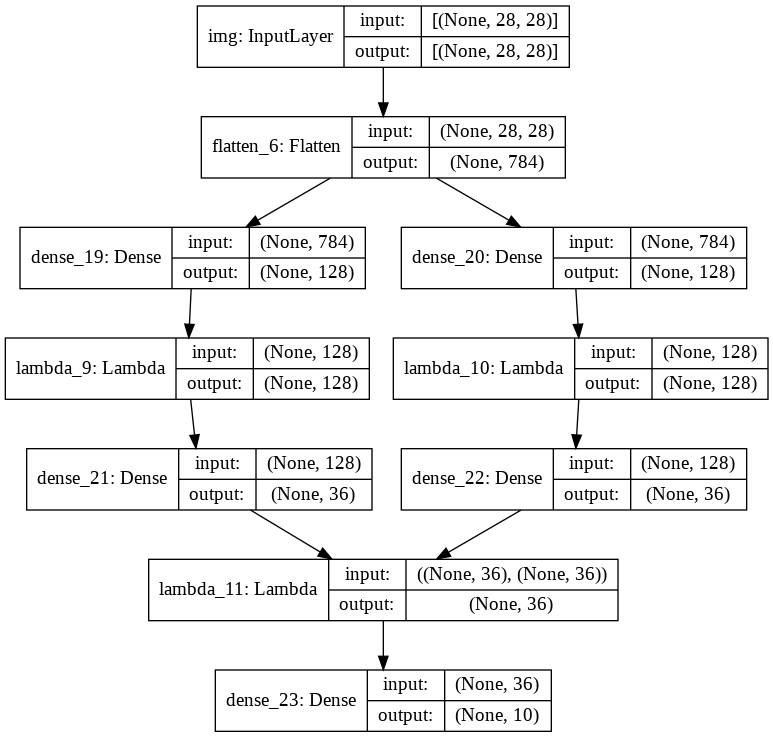

In [13]:
def connection(layerinputs):
    return layerinputs[0] + layerinputs[1]
inputs  = tf.keras.Input(shape=(28, 28), name="img")
flat  = tf.keras.layers.Flatten()(inputs)
branch1 = tf.keras.layers.Dense(128)(flat)
branch2 = tf.keras.layers.Dense(128)(flat)
branch1 = tf.keras.layers.Lambda(abs_not_relu)(branch1)
branch2 = tf.keras.layers.Lambda(abs_not_relu)(branch2)
branch1 = tf.keras.layers.Dense(36)(branch1)
branch2 = tf.keras.layers.Dense(36)(branch2)
x       = tf.keras.layers.Lambda(connection)((branch1,branch2))
outputs = tf.keras.layers.Dense(10)(x)

model = tf.keras.Model(inputs, outputs, name="multi_input_lambda")
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2418 - sparse_categorical_accuracy: 0.9296 - val_loss: 0.1051 - val_sparse_categorical_accuracy: 0.9684
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0883 - sparse_categorical_accuracy: 0.9733 - val_loss: 0.0958 - val_sparse_categorical_accuracy: 0.9706
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0597 - sparse_categorical_accuracy: 0.9811 - val_loss: 0.0792 - val_sparse_categorical_accuracy: 0.9759
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0413 - sparse_categorical_accuracy: 0.9876 - val_loss: 0.0835 - val_sparse_categorical_accuracy: 0.9747
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0322 - sparse_categorical_accuracy: 0.9898 - val_loss: 0.0909 - val_sparse_categorical_accuracy: 0.9760
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0266 - sparse_categorica